# **Galaxy Zotero Group Analysis**

Hello, welcome to the Galaxy Zotero Analysis. Data in this analysis comes from [Galaxy Zotero Group](https://www.zotero.org/groups/1732893/galaxy?), which including academic papers related to [Galaxy project](https://usegalaxy.org). The goal of this analysis is to explore 
* why Galaxy is so popular in biochemical as a provenance tool
* whether/how "real scientists" (scientists without computer related background)  use Galaxy Project to do some reproducibility or provenance related research. <br><br>

**Important Notice: Data used in this project is authorized by [Galaxy Zotero Group Members](https://www.zotero.org/groups/1732893/galaxy/members)  for this project only, if you want to use it in your own project, please contact the Galaxy Zoteo Group Members directly.** <br><br>
**If you have any questions regarding this analysis, feel free to contact Yilin Xia (yilinx2@illinois.edu)**

## System Requirements###
* Python Packages (pip freeze | grep package_name)
    * Pandas 0.24.2
    * requests 2.22.0
    * bs4 0.0.1
    * lxml 4.3.4   #you dont need to import but you have to install it to launch Beautifulsoup
    * matplotlib 3.1.0
    * numpy 1.16.4
    * mlxtend 0.16.0

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Data Collection
Here we use Galaxy API to get the data. Since the number of papers collected in this group is increasing, so when you want to collect latest datasets, you just need to change the ```range(0,7900,100)```  to ```range(0, x,100)```<br>
* x should be more than the total number of papers （you can find the number in this [page](https://www.zotero.org/groups/1732893/galaxy))
* x should be a mutiple of 100

In [3]:
# #create a blank dataframe
# df = pd.DataFrame(columns=['raw_data'])
# a=list()
# for start_no in range(0,7900,100):
#     limit_no=start_no+100
#     url='https://www.zotero.org/api/groups/1732893/items/top?start='+str(start_no)+"&limit="+str(limit_no)+'&order=title&sort=asc&content=json&format=atom&v=1&_=1560887212110'
#     res = requests.get(url)
#     soup = BeautifulSoup(res.content,'html.parser')
#     for i in range(len(soup.find_all("content"))):
#         df1 = pd.DataFrame([soup.find_all("content")[i].string],columns=['raw_data'])
#         df= pd.concat([df, df1])

After collecting raw data, resetting the ```index``` is necessary to standardize the dataset format. Furthremore, we can confirm whether we have collected the right datsets by droping the duplicate rows and comparing the number of rows.

In [4]:
# df=df.reset_index(drop=True)   # reset the index of dataframe
# df=df.drop_duplicates("raw_data")  # delete duplicate rows --> try to confirm that the right data is collected
# df.to_csv("Galaxy_Raw_Data.csv")

After finishing data collection through Galaxy API, then it is time to store it since the data collection is so time consuming.
==========================================Run From Here To Save Time ==============================================

In [5]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
df=pd.read_csv("Galaxy_Raw_Data.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7895 entries, 0 to 7894
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   raw_data  7895 non-null   object
dtypes: object(1)
memory usage: 61.8+ KB


Data we got here is raw data (7895 Rows*26 columns), and it is too dirty to analyze. To get ideal data, understanding each attribute is important, whose meaning is shown below.

| Zotero Attributes   | Meaning                                       |
| : ----------------- | : -----------------------                      |
| itemType            | Journal Article/ Conference/...                                                                                                                                     |
| title               | Paper title                                                                                                                                                         |
| creators            | Authors                                                                                                                                                             |
| abstractNote        | Abstract                                                                                                                                                            |
| Publication title   | Journal name/conference name                                                                                                                                        |
| Volume              | Volume typically refers to the number of years the publication has been circulated                                                                                  |
| issue               | Issue refers to how many times that periodical has been published during that year                                                                                  |
| pages               | Page No.- page No.                                                                                                                                                  |
| date                | Date of publication                                                                                                                                                 |
| series              | -                                                                                                                                                                   |
| seriesTitle         | -                                                                                                                                                                   |
| seriesText          | -                                                                                                                                                                   |
| journalAbbreviation | -                                                                                                                                                                   |
| language            | Language                                                                                                                                                           |
| DOI                 | Digital Object Identifier                                                                                                                                           |
| ISSN                | International Standard Serial Number                                                                                                                                |
| shortTitle          | Short Version of Paper Title                                                                                                                                        |
| url                 | Link to get the article                                                                                                                                             |
| accessDate          | -                                                                                                                                                                   |
| archive             | -                                                                                                                                                                   |
| archive location    | -                                                                                                                                                                   |
| libraryCatalog      | -                                                                                                                                                                   |
| callNumber          | -                                                                                                                                                                   |
| rights              | -                                                                                                                                                                   |
| extra               | -                                                                                                                                                                   |
| tags                | The library makes extensive use of tags to categorize publications and enable smarter searching(manually added by Galaxy Project and automatically added by Zotero) |

Below is the first five rows of our dataset. To show more details about each row, you can simply use ```df.iloc[0,0]```. 

In [8]:
df.head()

,raw_data
0,"{\n ""itemType"": ""journalArticle"",\n ""tit..."
1,"{\n ""itemType"": ""journalArticle"",\n ""tit..."
2,"{\n ""itemType"": ""bookSection"",\n ""title""..."
3,"{\n ""itemType"": ""journalArticle"",\n ""tit..."
4,"{\n ""itemType"": ""journalArticle"",\n ""tit..."


In [9]:
df.iloc[0,0]

'{\n    "itemType": "journalArticle",\n    "title": "“-Omics” workflow for paleolimnological and geological archives: A review",\n    "creators": [\n        {\n            "creatorType": "author",\n            "firstName": "Madison",\n            "lastName": "Bell"\n        },\n        {\n            "creatorType": "author",\n            "firstName": "Jules M.",\n            "lastName": "Blais"\n        }\n    ],\n    "abstractNote": "“-Omics” is a powerful screening method with applications in molecular biology, toxicology, wildlife biology, natural product discovery, and many other fields. Genomics, proteomics, metabolomics, and lipidomics are common examples included under the “-omics” umbrella. This screening method uses combinations of untargeted, semi-targeted, and targeted analyses paired with data mining to facilitate researchers\' understanding of the genome, proteins, and small organic molecules in biological systems. Recently, however, the use of “-omics” has expanded into t

## Data Cleaning
After getting the raw data, it is time to do data cleaning. At the very beginning, columns ```title```, ```itemType```, ```authors```, ```date```, ```DOI```, ```URL```, ```tags```, ```publication```, ```abstract```,   will be extracted from the raw data

In [10]:
df_dc=pd.DataFrame()
all_tags=[]
all_author=[]
all_pub=[]
for row_no in range(len(df)):
    
    language=""
    if '"language"' in df.iloc[row_no,0]:
        for slc in df.iloc[row_no,0].split("\n"):
            if '"language"' in slc :
                language=language+slc.split('"')[3]
    #else:
        #print(row_no)
    
    
    title=""
    for slc in df.iloc[row_no,0].split("\n"):
        if '"title"' in slc:
            title=title+slc.split('"')[3]
    
    itemType=""
    for slc in df.iloc[row_no,0].split("\n"):
        if '"itemType"' in slc:
            itemType=itemType+slc.split('"')[3]
    
    DOI=""
    for slc in df.iloc[row_no,0].split("\n"):
        if '"DOI"' in slc:
            DOI=DOI+slc.split('"')[3]
    
    tags=""
    for slc in df.iloc[row_no,0].split("\n"):
        if '"tag"' in slc and len(slc.split('"'))>3:
            tag=slc.split('"')[3]
            all_tags.append(tag)
            tags=tags+tag+"||"
    
    date=""
    if '"date"' in df.iloc[row_no,0]:
        for slc in df.iloc[row_no,0].split("\n"):
            if '"date"' in slc :
                date=date+slc.split('"')[3]
    #else:
        #print(row_no)

            
    abstract=""
    if '"abstractNote"' in df.iloc[row_no,0]:
        for slc in df.iloc[row_no,0].split("\n"):
            if '"abstractNote"' in slc and len(slc.split('"'))>3:
                abstract=abstract+slc[21:-2]
    #else:
        #print(row_no)
    
    
    URL=""
    if '"url"' in df.iloc[row_no,0]:
        for slc in df.iloc[row_no,0].split("\n"):
            if '"url"' in slc :
                URL=URL+slc.split('"')[3]
    #else:
        #print(row_no)
    
    
    author=""
    first_name=[]
    last_name=[]
    for slc in df.iloc[row_no,0].split("\n"):
        if '"firstName"' in slc:
            first_name.append(slc.split('"')[3])
        if '"lastName"' in slc:
            last_name.append(slc.split('"')[3])
    for num in range(len(first_name)):
        all_author.append(last_name[num]+","+first_name[num])
        author=author+last_name[num]+","+first_name[num]+"||"
    
    
    pub=""
    if '"publicationTitle"' or '"publisher"' in df.iloc[row_no,0]: 
        for slc in df.iloc[row_no,0].split("\n"):
            if  '"publicationTitle"' in slc:
                pub=pub+slc.split('"')[3]
            elif '"publisher"' in slc:
                pub=pub+slc.split('"')[3]
    all_pub.append(pub)
    #else:
        #print(row_no)                        #to ensure the programming scan all the columns
    
    df_dc.loc[row_no,"title"]=title
    df_dc.loc[row_no,"author"]=author
    df_dc.loc[row_no,"publication"]=pub
    df_dc.loc[row_no,"abstract"]=abstract
    df_dc.loc[row_no,"date"]=date
    df_dc.loc[row_no,"itemType"]=itemType
    df_dc.loc[row_no,"DOI"]=DOI
    df_dc.loc[row_no,"URL"]=URL
    df_dc.loc[row_no,"tags"]=tags
    df_dc.loc[row_no,"language"]=language

Here we can see the dataframe we want to further analysis. In the further analysis, additional cleaning operation might be needed.

In [11]:
df_dc.head()

,title,author,publication,abstract,date,itemType,DOI,URL,tags,language
0,“-Omics” workflow for paleolimnological and ge...,"Bell,Madison||Blais,Jules M.||",Science of The Total Environment,“-Omics” is a powerful screening method with a...,"July 1, 2019",journalArticle,10.1016/j.scitotenv.2019.03.477,http://www.sciencedirect.com/science/article/p...,+RefPublic||>Workflow4Metabolomics||Biomarkers...,
1,”Big Data” for breast cancer: where to look an...,"Clare,Susan E.||Shaw,Pamela L.||",npj Breast Cancer,,November 2016,journalArticle,10.1038/npjbcancer.2016.31,http://dx.doi.org/10.1038/npjbcancer.2016.31,+RefPublic||>GigaGalaxy||,
2,”Deciphering Archaeal Communities” Omics Tools...,"Pašić,Lejla||Martin-Cuadrado,Ana-Belen||López-...",Springer New York,,2016,bookSection,,http://dx.doi.org/10.1007/978-1-4939-3369-3_1,+Other||,
3,”Orphan” Retrogenes in the Human Genome,"Ciomborowska,Joanna||Rosikiewicz,Wojciech||Szk...",Molecular Biology and Evolution,Gene duplicates generated via retroposition we...,February 2013,journalArticle,10.1093/molbev/mss235,http://dx.doi.org/10.1093/molbev/mss235,+Methods||,
4,100 Years of evolving gene–disease complexitie...,"Zeeshan,Saman||Xiong,Ruoyun||Liang,Bruce T.||A...",Briefings in Bioinformatics,Abstract. It’s been over 100 years since the ...,11 April 2019,journalArticle,10.1093/bib/bbz038,https://academic.oup.com/bib/advance-article/d...,+Workbench||,en


In [12]:
#df_dc[df_dc["title"]==""]
#df_dc[df_dc["author"]==""]  #101 Papers without author
#df_dc[df_dc["publication"]==""]  # 521 papers without publication
#df_dc[df_dc["abstract"]==""]  # 1986 papers without abstract
#df_dc[df_dc["date"]==""]  # 1 paper without date
#df_dc[df_dc["itemType"]==""]
#df_dc[df_dc["DOI"]==""]  # 1007
#df_dc[df_dc["URL"]==""]  #84
#df_dc[df_dc["tags"]==""]  #7

In [13]:
df_dc_raw=df_dc

### Title
Delete paper in other language (14 papers)

In [14]:
df_dc.loc[1,"language"]

''

In [15]:
lan = []
for row_no in range(len(df_dc)):
    title = df_dc.loc[row_no, "title"]
    lang = df_dc.loc[row_no, "language"]
    abstract = df_dc.loc[row_no, "abstract"]
    if lang != "en" and lang != "eng" and lang != "English" and " the " not in title and [
            ord(c) > 128 for c in title
    ].count(True) > 1 and " and " not in title and " of " not in title and " for " not in title and " in " not in title and " with " not in title and " at " not in title and " that " not in title:
        lan.append(row_no)

In [16]:
df_dc.loc[lan,["title","abstract","DOI"]]

,title,abstract,DOI
2201,Desarrollo y despliegue de un workflow para el...,El auge de las nuevas técnicas de secuenciació...,
2237,Determinación de la microbiota intestinal en p...,Resumen\nIntroducción y objetivos\nLa microbio...,10.1016/j.rgmx.2018.02.010
2288,DÉVELOPPEMENT D'OUTILS BIO-INFORMATIQUES POUR ...,,
2289,Développement d’outils et de méthodes pour l’a...,L’épigénétique correspond aux mécanismes moléc...,
2879,Estudio metagenómico de microbioma oral humano...,La finalidad de este trabajo ha sido caracteri...,
2910,Evoluční a genetická analýza genomů rodu Trifo...,Rod Trifolium patří mezi nejvýznamnější a nejp...,
3138,Fréquence des polymorphismes du CYP2C9 chez le...,,10.1016/j.rhum.2013.08.005
3165,FTAG Finder : un outil simple pour déterminerl...,,
3333,Genética de poblaciones de la langosta roja (P...,A medida que más áreas marinas protegidas (AMP...,
3618,GromaXy: uma ferramenta para integração do Gal...,Considering the significant advances in biomol...,


In [17]:
df_dc0=df_dc.drop(df_dc.index[lan])
df_dc0=df_dc0[["title","author","publication","abstract","date","itemType","DOI","URL","tags"]]
df_dc0=df_dc0.reset_index(drop=True)

### Author
Try to fill the author column

In [18]:
df_dc1=df_dc0

In [19]:
author_uniq=list(set(all_author))

### Publication

In [20]:
df_dc2=df_dc1

In [21]:
len(df_dc2["publication"].unique())

1627

### Abstract

In [22]:
df_dc3=df_dc2

### Date
transform all date data to format "year"

In [23]:
df_dc4=df_dc3

In [24]:
for row_no in range(len(df_dc4)):
    day = df_dc4.loc[row_no,"date"]
    if " " in day and len(day.split()[-1])==4:
        df_dc4.loc[row_no,"date"]=day.split()[-1]
    elif "/" in day and len(day.split("/")[0])==4:
        df_dc4.loc[row_no,"date"]=day.split("/")[0]
    elif len(day)==4:
        df_dc4.loc[row_no,"date"]=day
    elif "-" in day and len(day.split("-")[0])==4:
        df_dc4.loc[row_no,"date"]=day.split("-")[0]
    elif "/" in day and len(day.split("/")[-1])==4:
        df_dc4.loc[row_no,"date"]=day.split("/")[-1]
    else:
        print(row_no,day)

34 
1247 2017.
2446 2018 Feb 21
3603 10/09/2018 09:16:48
5533 13/12/2018 14:01:53
6072 2017.
6323 2017 Oct 23
7184 2018 Feb 20
7526 2018 Feb 19


In [25]:
df_dc4=df_dc4.drop(df_dc4.index[34])
df_dc4.loc[1247,"date"]='2017'
df_dc4.loc[2446,"date"]='2018'
df_dc4.loc[3603,"date"]='2018'
df_dc4.loc[5533,"date"]='2018'
df_dc4.loc[6072,"date"]='2017'
df_dc4.loc[6323,"date"]='2017'
df_dc4.loc[7184,"date"]='2018'
df_dc4.loc[7526,"date"]='2018'

In [26]:
df_dc4=df_dc4.reset_index(drop=True)

In [27]:
df_dc4["date"].unique()

array(['2019', '2016', '2013', '2015', '2018', '2017', '2014', '2007',
       '2011', '2012', '2008', '2009', '2010', '2006', '2005'],
      dtype=object)

### Itemtypes

In [28]:
df_dc5=df_dc4
df_dc5["itemType"].unique()

array(['journalArticle', 'bookSection', 'book', 'conferencePaper',
       'thesis', 'report'], dtype=object)

### DOI & URL
extract doi from column "url"

In [29]:
df_dc6=df_dc5

In [30]:
for row_no in range(len(df_dc5)):
    if df_dc5.loc[row_no,"DOI"]=="":
        if "doi.org" in df_dc5.loc[row_no,"URL"]:
            df_dc5.loc[row_no,"DOI"]=df_dc5.loc[row_no,"URL"].split("doi.org/")[1]

### Tags

In [31]:
df_dc7=df_dc6

In [32]:
df_dc7[df_dc7["tags"]==""]

,title,author,publication,abstract,date,itemType,DOI,URL,tags
1143,BMP Signaling Determines Body Size via Transcr...,"Madaan,Uday||Yzeiraj,Edlira||Meade,Michael||Cl...",Genetics,,2018,journalArticle,10.1534/genetics.118.301631,http://www.genetics.org/lookup/doi/10.1534/gen...,
2347,Digital expression explorer 2: a repository of...,"Ziemann,Mark||Kaspi,Antony||El-Osta,Assam||",GigaScience,AbstractBackground. RNA sequencing (RNA-seq) ...,2019,journalArticle,10.1093/gigascience/giz022,https://academic.oup.com/gigascience/article/8...,
3896,Identification of brain metastasis genes and t...,"Kim,Soo-Hyun||Redvers,Richard P.||Chi,Lap Hing...",Disease Models & Mechanisms,Skip to Next Section\nBreast cancer brain meta...,2018,journalArticle,10.1242/dmm.034850,http://dmm.biologists.org/content/11/7/DMM034850,
5681,Proceedings of Indian conference on Bioinforma...,"Dutta,Bharmar||",International Journal for Computational Biolog...,,2018,journalArticle,,http://ijcb.in/ijcb/v2/index.php/ijcb/article/...,
5734,Proteogenomics and Hi-C reveal transcriptional...,"Yang,Minjun||Vesterlund,Mattias||Siavelis,Ioan...",Nature Communications,High hyperploidy is a common feature in childh...,2019,journalArticle,10.1038/s41467-019-09469-3,https://www.nature.com/articles/s41467-019-094...,
6537,Spfy: an integrated graph database for real-ti...,"Le,Kevin K.||Whiteside,Matthew D.||Hopkins,Jam...",Database,Abstract. Public health laboratories are curr...,2018,journalArticle,10.1093/database/bay086,https://academic.oup.com/database/article/doi/...,


In [33]:
df_dc=df_dc7

## Tags Analysis
According to the [definition](https://galaxyproject.org/publication-library/) of tags given by Galaxy Zotero Group,tags are composed by two parts --> some are mannually added by Galaxy project group and others are automatically generated by Zotero. As a result, this analysis would be devided into two parts.

In [34]:
print("Number of tags in Galaxy Group: "+ str(len(all_tags)))

Number of tags in Galaxy Group: 22434


In [35]:
all_tags_unique=list(set(all_tags))
print("Number of Unique tags in Galaxy Group: "+ str(len(all_tags_unique)))

Number of Unique tags in Galaxy Group: 6569


In [36]:
gal_spe_tags=[]
pub_pla_tags=[]
auto_tags=[]
for tag in all_tags_unique:
    if tag[0]=="+":
        gal_spe_tags.append(tag)
    elif tag[0]==">":
        pub_pla_tags.append(tag)
    else:
        auto_tags.append(tag)

In [37]:
print("Number of in Galaxy Group: "+ str(len(gal_spe_tags)))

Number of in Galaxy Group: 20


In [38]:
print("Number of Public Platform tags in Galaxy Group: "+ str(len(pub_pla_tags)))

Number of Public Platform tags in Galaxy Group: 168


In [39]:
pub_pla_tags

['>BitLAB',
 '>Langille',
 '>TGM',
 '>Splicescope',
 '>DBCLS',
 '>SMAGEXP',
 '>Osiris',
 '>GVL-Unspecified',
 '>VarCap',
 '>DeepVirome',
 '>Kmer-SVM',
 '>AB-OpenLab',
 '>MPI-HLR',
 '>Proteogenomics Gateway',
 '>Trinity',
 '>ErasmusMC',
 '>Mandoiu',
 '>Vinther Lab',
 '>EWAS-Galaxy',
 '>FACE-IT',
 '>RDF2Graph',
 '>ProteoRE',
 '>QuanTP',
 '>CBIB',
 '>Oqtans',
 '>WUR',
 '>GenOuest',
 '>TreeGenes',
 '>Mississippi',
 '>ARIES',
 '>LiSIs',
 '>GeneLab',
 '>NCGAS',
 '>Orione',
 '>SouthGreen',
 '>SIFTED',
 '>Codon Harmonizer',
 '>Huttenhower',
 '>ARGA',
 '>Biomina',
 '>RiceGalaxy',
 '>Nebula',
 '>GIO',
 '>PL-Grid',
 '>PiRATE',
 '>Palfinder',
 '>ANASTASIA',
 '>GenAP',
 '>ImmPort',
 '>MGS-Fast',
 '>CRAVAT-P',
 '>Genomic Hyperbrowser',
 '>RiboGalaxy',
 '>CART',
 '>ARGs-OAP',
 '>SymD',
 '>PlantGenie',
 '>UseGalaxy.eu',
 '>RNA Workbench',
 '>NeLS',
 '>BIPAA',
 '>SCDE',
 '>GraphClust',
 '>Sciensano',
 '>ASH',
 '>Hunter',
 '>AmrPlusPlus',
 '>Laniakea',
 '>VirAmp',
 '>PredPharmTox',
 '>CAFU',
 '>BioMaS',

In [40]:
print("Number of Automatically Generated tags in Galaxy Group: "+ str(len(auto_tags)))

Number of Automatically Generated tags in Galaxy Group: 6381


For these two type of tags, here serveral analysis have been launched on the original data. First we need to transform the ```df_dc``` dataset to a metrix, each tag would become a column in the new dataset, where the value of each cell shows whether this paper contains this tag (value =1) or not (value =0).

In [41]:
def transform(dataset, tags):
    df_tr=pd.DataFrame()
    for tag in tags:
        df_tr[tag] = dataset.tags.apply(lambda x: 1 if tag in x else 0)
    return (df_tr)

When transformation is done, we can continue visualize the tags data. By adding each column, we can get the total number of papers each tag contained and just visualize it as a histogram.

In [42]:
def plot_dis_tags(df_re,tags,fontsize):
    lis=[]
    for tag in tags:
        lis.append(df_re[tag].sum())

    name_list = tags
    num_list = lis
    f,ax= plt.subplots(figsize = (14, 10))
    plt.bar(range(len(num_list)),num_list, color="cornflowerblue",tick_label=name_list)
    ax.set_xticklabels(name_list,rotation=90) 
    ax.set_title('Number of Papers Each Tag contains')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)

    xlocs, xlabs = plt.xticks()
    xlocs=[i+1 for i in range(len(tags))]
    xlabs=[i/2 for i in range(len(tags))]
    for i, v in enumerate(lis):
        plt.text(xlocs[i]-1.4, v + max(lis)/80, str(v),fontsize=fontsize)

Sometimes, the number of papers each tag contained is so small, so this filter function is neccessary for us to reduce rows.

In [43]:
def tags_tr_filter(tags_tr,x):
    tags_sort=pd.DataFrame(columns=["tags","number"])
    row_no=0
    for tag in tags_tr.columns:
        tags_sort.loc[row_no]=[tag,tags_tr[tag].sum()]
        row_no=row_no+1
    filter_tag=tags_sort.sort_values(by=['number'], ascending=False).reset_index(drop=True).iloc[:x]
    filter_tag_list=[]
    for tag in filter_tag["tags"]:
        filter_tag_list.append(tag)
    tags_tr=tags_tr[filter_tag_list]
    return(tags_tr)

In [44]:
def tags_filter(tags_tr,x):
    tags_sort=pd.DataFrame(columns=["tags","number"])
    row_no=0
    for tag in tags_tr.columns:
        tags_sort.loc[row_no]=[tag,tags_tr[tag].sum()]
        row_no=row_no+1
    filter_tag=tags_sort.sort_values(by=['number'], ascending=False).reset_index(drop=True).iloc[:x]
    filter_tag_list=[]
    for tag in filter_tag["tags"]:
        filter_tag_list.append(tag)
    tags_tr=tags_tr[filter_tag_list]
    return(filter_tag_list)

### Analysis of Manually Added Tags

Mannually added tags could be devided into two groups, one is Galaxy Specific Tags start with "+" and one is Public Platform tags start with">"

### Analysis of Galaxy Specific Tags

In [45]:
gal_spe_tags_tr=transform (df_dc,gal_spe_tags)
gal_spe_tags_tr.head()

,+UseLocal,+Tools,+IsGalaxy,+Reproducibility,+Stellar,+UsePublic,+Methods,+Education,+Unknown,+Cloud,+Shared,+Workbench,+Project,+Galactic,+UseCloud,+UseMain,+Other,+Visualization,+HowTo,+RefPublic
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


When transformation is done, we can continue visualize the tags data. By summarizing each column, we can get the total number of each tags and just visualize it as a histogram.

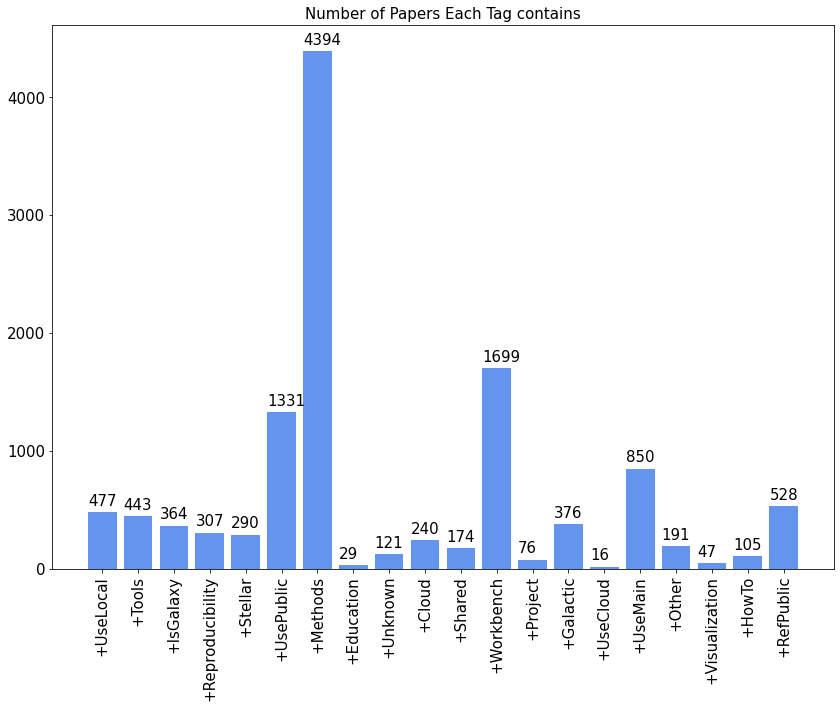

In [46]:
plot_dis_tags (gal_spe_tags_tr,gal_spe_tags,15)

Through the graph above, it is clear to find out that

| Tags Name   | Number of papers | Meaning of the tag                                                                                               |
|-------------|------------------|------------------------------------------------------------------------------------------------------------------|
| + Methods   | 4402             | Uses Galaxy in their methods.                                                                                    |
| + Workbench | 1706             | Publication mentions Galaxy as a platform                                                                        |
| + UsePublic | 1335             | Uses a publicly accessible Galaxy platform in its methods                                                        |
| + UseMain   | 850              | Uses the project's public server, usegalaxy.org (a.k.a. Main, in its methods.)                                   |
| + RefPublic | 532              | References a publicly accessible Galaxy instance or a Galaxy service.  This is distinct from the +UsePublic tag. |

As for the tag "reproducibility", the number of paper under this category is 308<br><br>

### Analysis of Public Platform Tags
Publications that mention or use a public Galaxy platform are tagged with the platform's name, preceded by a ">". For example, the >RepeatExplorer tag lists all papers that use or reference the RepeatExplorer public server.

In [47]:
pub_pla_tags_tr=transform (df_dc,pub_pla_tags)
pub_pla_tags_tr.head()

,>BitLAB,>Langille,>TGM,>Splicescope,>DBCLS,>SMAGEXP,>Osiris,>GVL-Unspecified,>VarCap,>DeepVirome,...,>Cistrome,>ChimeRScope,>HiCExplorer,>Halogen Bonding,>Bio-Docklets,>APOSTL,>RNA-Rocket,>Galaxy-P,>UseGalaxy.org.au,>CoSSci
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
pub_pla_filter_tags=tags_filter(pub_pla_tags_tr,20)
pub_pla_filter_tags_tr=tags_tr_filter(pub_pla_tags_tr,20)

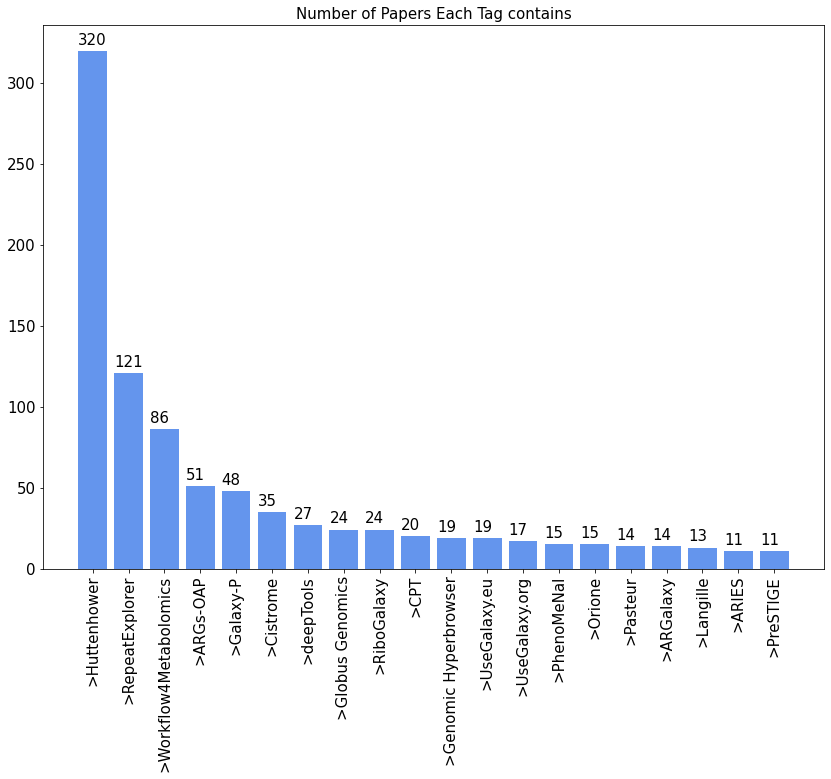

In [49]:
plot_dis_tags (pub_pla_filter_tags_tr,pub_pla_filter_tags,15)

For the public platform tags, three public platforms are frequently used including “>Huttenhower” “>RepeatExplorer” and “>workflow4metabolomics”

**Huttenhower**: metagenomic and functional genomic analyses, intended for **research and academic use**

**RepeatExplorer**: Graph-based clustering and characterization of repetitive sequences, and detection of transposable element protein coding domains.

**Workflow4metabolomics** : A collaborative portal dedicated to metabolomics data processing, analysis and annotation.

### Analysis of Automatically Generated Tags

In [50]:
auto_tags_tr=transform (df_dc,auto_tags)

In [51]:
auto_tags_tr.head()

,predicted metagenome function,human health,Free energy,Taxonomy,in-silico data analysis workflows,nutrition,single-cell,16S RNA,mtDNA,bone morphogenetic protein,...,KLF7,Ancestry inference,BDNF polymorphism,Marine primary producer,Probiotic bacteria,metabolic control analysis,Lasiosphaeriaceae,Why-Diff,PICRUSt,epigenetic erasure
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
auto_tags_filter=tags_filter(auto_tags_tr,20)
auto_tags__filter_tr=tags_tr_filter(auto_tags_tr,20)

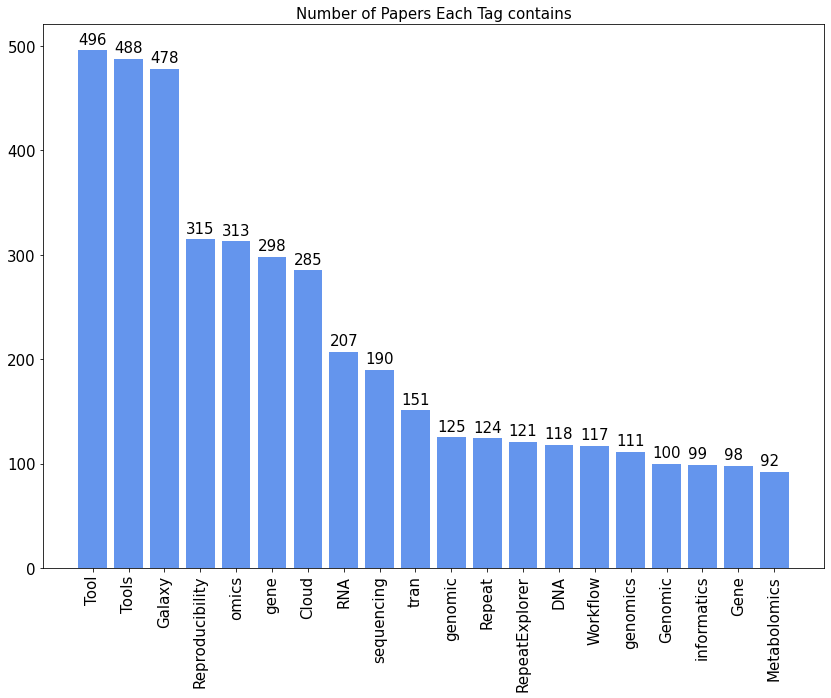

In [53]:
plot_dis_tags (auto_tags__filter_tr,auto_tags_filter,15)

Through the graph above, it is clear to find out provenance related keywords "Reproducibility" "Repeat" " Workflow"

### Interactive Visualization of Tags Combination & Paper Filter

To show the distribution of tags data more vivid, here we use **interactive visualiztaion to display distribution of different combination of tags and papers corresponding to each combination**

In [54]:
def filter_row(df_filter):     # filter the rows whose value equals to 1
    for tag in tags_choosen:
        df_filter=df_filter[df_filter[tag]==1]
    return(df_filter)

In [55]:
all_tags_tr=transform (df_dc,all_tags_unique)
all_tags_tr.head()

,predicted metagenome function,human health,Free energy,Taxonomy,in-silico data analysis workflows,nutrition,single-cell,16S RNA,mtDNA,bone morphogenetic protein,...,KLF7,Ancestry inference,BDNF polymorphism,Marine primary producer,Probiotic bacteria,metabolic control analysis,Lasiosphaeriaceae,Why-Diff,PICRUSt,epigenetic erasure
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
all_tags_unique=tags_filter(all_tags_tr,50)
all_tags_tr=tags_tr_filter(all_tags_tr,50)

In [57]:
import ipywidgets as widgets
a=widgets.SelectMultiple(options = all_tags_tr.columns.tolist())
display(a)

SelectMultiple(options=('+Methods', '+Workbench', '+UsePublic', '+UseMain', '+RefPublic', 'Tool', 'Tools', 'Ga…

By choosing the combination of different tags, result could be shown in the graph below. If people want choose multiple tags, please press ```command``` on Mac and ```control``` on Windows. 

The number of papers under these chosen tags()is:7871


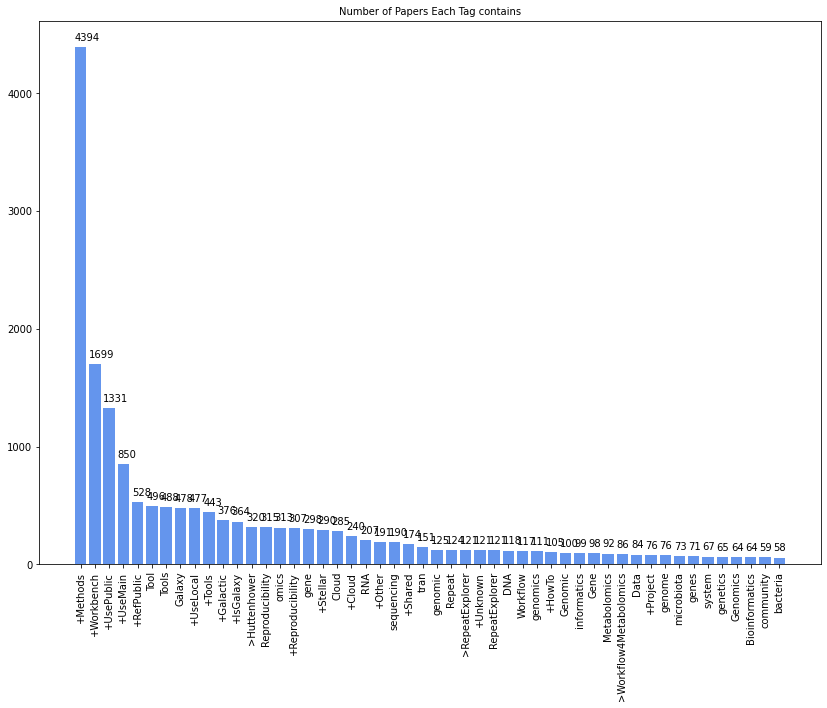

In [58]:
tags_choosen=list(a.value)
df_filter=filter_row(all_tags_tr)
print("The number of papers under these chosen tags"+str(a.value)+"is:"+str(len(df_filter)))
plot_dis_tags(df_filter,all_tags_unique,10)

List of papers under this certain combination of tags including paper titles and DOI would show below

In [59]:
df_filter_paper=pd.DataFrame()
for index_no in df_filter.index:
    df1=df_dc[index_no:index_no+1]
    df_filter_paper= pd.concat([df_filter_paper, df1])
df_filter_doi=df_filter_paper[["title","DOI"]]
df_filter_doi.head()

,title,DOI
0,“-Omics” workflow for paleolimnological and ge...,10.1016/j.scitotenv.2019.03.477
1,”Big Data” for breast cancer: where to look an...,10.1038/npjbcancer.2016.31
2,”Deciphering Archaeal Communities” Omics Tools...,10.1007/978-1-4939-3369-3_1
3,”Orphan” Retrogenes in the Human Genome,10.1093/molbev/mss235
4,100 Years of evolving gene–disease complexitie...,10.1093/bib/bbz038


In [60]:
df_filter_time=df_filter_paper[["date"]]

### Association Rules

In [61]:
filter_tags_tr=all_tags_tr
frequent_itemsets = apriori(filter_tags_tr, min_support=0.05, use_colnames=True)
print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

     support                itemsets
0   0.558252              (+Methods)
1   0.215856            (+Workbench)
2   0.169102            (+UsePublic)
3   0.107991              (+UseMain)
4   0.067082            (+RefPublic)
5   0.063016                  (Tool)
6   0.062000                 (Tools)
7   0.060729                (Galaxy)
8   0.060602             (+UseLocal)
9   0.056283                (+Tools)
10  0.166307  (+UsePublic, +Methods)
11  0.105196    (+Methods, +UseMain)
12  0.060094   (+Methods, +UseLocal)
13  0.062000           (Tool, Tools)
14  0.056283          (Tool, +Tools)
15  0.056283         (+Tools, Tools)
16  0.056283   (Tool, +Tools, Tools)
        antecedents      consequents  antecedent support  consequent support  \
0      (+UsePublic)       (+Methods)            0.169102            0.558252   
1        (+Methods)     (+UsePublic)            0.558252            0.169102   
2        (+Methods)       (+UseMain)            0.558252            0.107991   
3        (+Use

When setting the min_support as 0.05, there is little useful information for our research

## Input stored data

In [62]:
df_dc.to_csv("df_dc.csv")

Due to the testriction of Wholetale, here we got paper from local computer

## Write SQL-lite

### Preparation

**df_dc** dataset after cleaning<br>
**all_tags** all the tags<br>

In [63]:
df_dc.head(2)

,title,author,publication,abstract,date,itemType,DOI,URL,tags
0,“-Omics” workflow for paleolimnological and ge...,"Bell,Madison||Blais,Jules M.||",Science of The Total Environment,“-Omics” is a powerful screening method with a...,2019,journalArticle,10.1016/j.scitotenv.2019.03.477,http://www.sciencedirect.com/science/article/p...,+RefPublic||>Workflow4Metabolomics||Biomarkers...
1,”Big Data” for breast cancer: where to look an...,"Clare,Susan E.||Shaw,Pamela L.||",npj Breast Cancer,,2016,journalArticle,10.1038/npjbcancer.2016.31,http://dx.doi.org/10.1038/npjbcancer.2016.31,+RefPublic||>GigaGalaxy||


**full_table**  paper_id/ title/author/itemType/year/abstract/publication/tags <br> 

In [64]:
full_table=df_dc[["title","author","itemType","date","publication","abstract","tags"]].reset_index()

In [65]:
full_table.columns=["paper_id","title","author","itemType","year","publication","abstract","tags"]

In [66]:
for row_no in range(len(full_table)):
    paperID="P"+ str(full_table.iloc[row_no,0])
    full_table.iloc[row_no,0]=paperID

In [67]:
full_table.head(2)

,paper_id,title,author,itemType,year,publication,abstract,tags
0,P0,“-Omics” workflow for paleolimnological and ge...,"Bell,Madison||Blais,Jules M.||",journalArticle,2019,Science of The Total Environment,“-Omics” is a powerful screening method with a...,+RefPublic||>Workflow4Metabolomics||Biomarkers...
1,P1,”Big Data” for breast cancer: where to look an...,"Clare,Susan E.||Shaw,Pamela L.||",journalArticle,2016,npj Breast Cancer,,+RefPublic||>GigaGalaxy||


<img src="ER_V1.png">

**tag_table** tag_id/tag_name/tag_type  <br>
**contain_table**  paper_id/ tag_id <br>
**paper_table**  paper_id/ paper_title/itemType/abstract/pub_name/pub_date <br>
**author_table** author_id / author_name<br>
**write_table** author_id/ paper_id<br>

**tag_table** tag_id/tag_name/tag_type  <br>

In [68]:
tag_table=pd.DataFrame()
tag_table1=pd.DataFrame()
tag_table2=pd.DataFrame()
tag_table["tag"]=gal_spe_tags
tag_table["tag_type"]="Galaxy Specific Tag"
tag_table1["tag"]=pub_pla_tags
tag_table1["tag_type"]="Public Platform Tag"
tag_table2["tag"]=auto_tags
tag_table2["tag_type"]="Zotero Automatically Generated Tag"
tag_table= pd.concat([tag_table, tag_table1])
tag_table= pd.concat([tag_table, tag_table2])
tag_table=tag_table.reset_index(drop=True)
tag_table=tag_table.reset_index()

In [69]:
tag_table.columns=["tag_id","tag_name","tag_type"]

In [70]:
for row_no in range(len(tag_table)):
    tagID="T"+ str(tag_table.iloc[row_no,0])
    tag_table.iloc[row_no,0]=tagID

In [71]:
tag_table.head()

,tag_id,tag_name,tag_type
0,T0,+UseLocal,Galaxy Specific Tag
1,T1,+Tools,Galaxy Specific Tag
2,T2,+IsGalaxy,Galaxy Specific Tag
3,T3,+Reproducibility,Galaxy Specific Tag
4,T4,+Stellar,Galaxy Specific Tag


**contain_table** paper_ID/tag_ID

In [72]:
contain=full_table[["paper_id","tags"]]

In [73]:
dic=pd.Series(tag_table.tag_id.values,index=tag_table.tag_name).to_dict()

In [74]:
contain_table=pd.DataFrame(columns=["paper_id","tag_id"])
for row_no in range(len(contain)):
    for tag in contain.iloc[row_no,1].split("||"):
        
        if tag in list(tag_table["tag_name"]):
            paper_id=contain.iloc[row_no,0]
            df1 = pd.DataFrame({'paper_id':[paper_id],'tag_id':[dic[tag]]})
            contain_table= pd.concat([contain_table, df1])

In [75]:
contain_table.head()

,paper_id,tag_id
0,P0,T19
0,P0,T132
0,P0,T4774
0,P0,T6029
0,P0,T2873


**paper_table**  paper_id/ paper_title/itemType/abstract/pub_name/pub_date <br>

In [76]:
paper_table=full_table[["paper_id","title","itemType","abstract","publication","year"]]

In [77]:
paper_table.head()

,paper_id,title,itemType,abstract,publication,year
0,P0,“-Omics” workflow for paleolimnological and ge...,journalArticle,“-Omics” is a powerful screening method with a...,Science of The Total Environment,2019
1,P1,”Big Data” for breast cancer: where to look an...,journalArticle,,npj Breast Cancer,2016
2,P2,”Deciphering Archaeal Communities” Omics Tools...,bookSection,,Springer New York,2016
3,P3,”Orphan” Retrogenes in the Human Genome,journalArticle,Gene duplicates generated via retroposition we...,Molecular Biology and Evolution,2013
4,P4,100 Years of evolving gene–disease complexitie...,journalArticle,Abstract. It’s been over 100 years since the ...,Briefings in Bioinformatics,2019


**author_table** author_id / author_name<br>

In [78]:
author_table=pd.DataFrame()
author_table["author_name"]=author_uniq
author_table=author_table.reset_index(drop=True)
author_table=author_table.reset_index()
for row_no in range(len(author_table)):
    authorID="A"+ str(author_table.iloc[row_no,0])
    author_table.iloc[row_no,0]=authorID

In [79]:
author_table.columns=["author_id","author_name"]
author_table.head()

,author_id,author_name
0,A0,"Starns,David"
1,A1,"Nish,Simone A."
2,A2,"Fawcett,Katherine A."
3,A3,"Fagerholm,Susanna C."
4,A4,"Pérez-Moreno,Jorge L."


**write_table** author_id/ paper_id<br>

In [80]:
write=full_table[["paper_id","author"]]

In [81]:
dic_author=pd.Series(author_table.author_id.values,index=author_table.author_name).to_dict()

In [82]:
write_table=pd.DataFrame(columns=["paper_id","author_id"])
for row_no in range(len(write)):
    for author in write.iloc[row_no,1].split("||"):
        if author in list(author_table["author_name"]):
            paper_id=write.iloc[row_no,0]
            df1 = pd.DataFrame({'paper_id':[paper_id],'author_id':[dic_author[author]]})
            write_table= pd.concat([write_table, df1])

In [83]:
write_table.head()

,paper_id,author_id
0,P0,A12571
0,P0,A37240
0,P1,A25944
0,P1,A2125
0,P2,A7090


### Write to SQL

In [4]:
import sqlite3 as db
galaxy = db.connect('Project.sqlite')
paper_table.to_sql('paper_table', galaxy, if_exists='replace', index=False)
tag_table.to_sql('tag_table', galaxy, if_exists='replace', index=False)
contain_table.to_sql('contain_table', galaxy, if_exists='replace', index=False)
author_table.to_sql('author_table', galaxy, if_exists='replace', index=False)
write_table.to_sql('write_table', galaxy, if_exists='replace', index=False)

NameError: name 'paper_table' is not defined

## SQL Query

In [5]:
import sqlite3 as db
galaxy = db.connect('Project.sqlite')
pd.read_sql("SELECT * FROM tag_table LIMIT 3",galaxy) #tag_table

,tag_id,tag_name,tag_type
0,T0,+UseLocal,Galaxy Specific Tag
1,T1,+Tools,Galaxy Specific Tag
2,T2,+IsGalaxy,Galaxy Specific Tag


In [6]:
pd.read_sql("SELECT * FROM paper_table LIMIT 3",galaxy) #paper_table

,paper_id,title,itemType,abstract,publication,year
0,P0,“-Omics” workflow for paleolimnological and ge...,journalArticle,“-Omics” is a powerful screening method with a...,Science of The Total Environment,2019
1,P1,”Big Data” for breast cancer: where to look an...,journalArticle,,npj Breast Cancer,2016
2,P2,”Deciphering Archaeal Communities” Omics Tools...,bookSection,,Springer New York,2016


In [7]:
pd.read_sql("SELECT * FROM contain_table LIMIT 3",galaxy) 
#relationship between paper and tags

,paper_id,tag_id
0,P0,T19
1,P0,T132
2,P0,T4774


In [8]:
pd.read_sql("SELECT * FROM author_table LIMIT 3",galaxy) #author_table

,author_id,author_name
0,A0,"Starns,David"
1,A1,"Nish,Simone A."
2,A2,"Fawcett,Katherine A."


In [9]:
pd.read_sql("SELECT * FROM write_table LIMIT 3",galaxy) #paper and author

,paper_id,author_id
0,P0,A12571
1,P0,A37240
2,P1,A25944


### Publication and author

In [20]:
sql_query = """
  SELECT sum(paper_num)
  FROM(
      SELECT publication, COUNT(title) as paper_num
      FROM paper_table
      Group By publication
      Order BY paper_num DESC
  )
"""
pd.read_sql(sql_query, galaxy)

,sum(paper_num)
0,7871


In [11]:
sql_query = """
    SELECT author_name, COUNT(paper_id) as paper_num
    FROM(
        SELECT *
        FROM paper_table
        JOIN write_table
        ON paper_table.paper_id=write_table.paper_id 
        JOIN author_table
        ON write_table.author_id=author_table.author_id
    )
    GROUP BY author_name
    ORDER BY paper_num DESC LIMIT 10
"""
pd.read_sql(sql_query, galaxy)

,author_name,paper_num
0,"Taylor,James",50
1,"Nekrutenko,Anton",43
2,"Backofen,Rolf",30
3,"Foster,Ian",28
4,"Kuty Everett,Gabriel F.",27
5,"Afgan,Enis",25
6,"Makova,Kateryna D.",24
7,"Grüning,Björn",22
8,"Gesing,Sandra",22
9,"Blankenberg,Daniel",22


### Paper Filter

In [21]:
pd.read_sql("SELECT * FROM paper_table WHERE title like'%provenance%'",galaxy)

,paper_id,title,itemType,abstract,publication,year
0,P284,A Provenance-based heuristic for preserving re...,journalArticle,Cloud computing relies on resource sharing to ...,Future Generation Computer Systems,2019
1,P285,A provenance-based solution for software selec...,conferencePaper,,IEEE,2013
2,P359,A survey on provenance: What for? What form? W...,journalArticle,Provenance refers to any information describin...,The VLDB Journal,2017
3,P470,Addressing Provenance Issues in Big Data Genom...,conferencePaper,,,2016
4,P886,Automatic generation of provenance metadata du...,conferencePaper,Data processing in data intensive scientiﬁc ﬁe...,,2018
5,P896,AVOCADO: Visualization of Workflow-Derived Dat...,journalArticle,"bioRxiv - the preprint server for biology, ope...",bioRxiv,2016
6,P1536,Cloud infrastructure provenance collection and...,journalArticle,The Reproduce Scientific Workflow Execution us...,Future Generation Computer Systems,2017
7,P2084,Data provenance management for bioinformatics ...,conferencePaper,Computer science solutions for molecular biolo...,,2017
8,P2501,Documenting Provenance for Reproducible Marine...,bookSection,,IGI Global,2017
9,P2736,Enabling precision medicine via standard commu...,journalArticle,A personalized approach based on a patient's o...,PLOS Biology,2018


In [22]:
pd.read_sql("SELECT * FROM paper_table WHERE title like'%workflow%'",galaxy)

,paper_id,title,itemType,abstract,publication,year
0,P0,“-Omics” workflow for paleolimnological and ge...,journalArticle,“-Omics” is a powerful screening method with a...,Science of The Total Environment,2019
1,P14,2014 IEEE 28th International Parallel & Distri...,book,,,2014
2,P52,A characterization of workflow management syst...,journalArticle,A description of the requirements for the desi...,Future Generation Computer Systems,2017
3,P58,A cloud-based workflow to quantify transcript-...,journalArticle,,Scientific Reports,2016
4,P79,A complete workflow for high-resolution spectr...,journalArticle,,Nature Protocols,2017
...,...,...,...,...,...,...
356,P7835,WorkWays: Interacting with Scientific Workflows,conferencePaper,"This paper presents WorkWays, a workflow-based...",IEEE Press,2014
357,P7844,xGDBvm: A Web GUI-driven workflow for annotati...,journalArticle,Genome-wide annotation of gene structure requi...,The Plant Cell,2016
358,P7846,"XiP: a computational environment to create, ex...",journalArticle,XiP (eXtensible integrative Pipeline) is a fle...,Bioinformatics,2013
359,P7852,YAMP: a containerized workflow enabling reprod...,journalArticle,"Abstract. YAMP (\""Yet Another Metagenomics Pi...",GigaScience,2018


In [14]:
pd.read_sql("SELECT * FROM paper_table WHERE title like'%reproducibility%'",galaxy)

,paper_id,title,itemType,abstract,publication,year
0,P112,"A demonstration of modularity, reuse, reproduc...",journalArticle,Multi-scale computational modeling is a major ...,PLOS Computational Biology,2019
1,P142,A framework for scientific workflow reproducib...,conferencePaper,,,2016
2,P227,A multi-center study on factors influencing th...,journalArticle,<p>Evidence that some influential biomedical r...,bioRxiv,2019
3,P512,Alan Turing Institute symposium on reproducibi...,report,,,2016
4,P631,An International Ki67 Reproducibility Study in...,journalArticle,Despite the established role of Ki67 labeling ...,The American Journal of Surgical Pathology,2016
...,...,...,...,...,...,...
72,P7328,Towards Reproducibility in Scientific Workflow...,journalArticle,,Scientific Programming,2015
73,P7329,Towards Reproducibility of Microscopy Experiments,journalArticle,,D-Lib Magazine,2017
74,P7338,"Traceability, reproducibility and wiki-explora...",journalArticle,Genome-scale metabolic models have become the ...,PLOS Computational Biology,2018
75,P7576,Use of semantic workflows to enhance transpare...,journalArticle,Recent highly publicized cases of premature pa...,Genome Medicine,2015


In [15]:
pd.read_sql("SELECT * FROM paper_table WHERE abstract like'%provenance%'",galaxy)

,paper_id,title,itemType,abstract,publication,year
0,P322,A Scientific Workflow Framework for 13C Metabo...,journalArticle,13C metabolic flux analysis is a high-precisio...,Journal of Biotechnology,2015
1,P325,A Semantic Workflow Approach to Web Science An...,conferencePaper,Reproducibility and reuse are rapidly becoming...,ACM,2017
2,P359,A survey on provenance: What for? What form? W...,journalArticle,Provenance refers to any information describin...,The VLDB Journal,2017
3,P445,Active Data: A programming model to manage dat...,journalArticle,We present a formal model to represent the lif...,Future Generation Computer Systems,2015
4,P777,Applications of the pipeline environment for v...,journalArticle,Contemporary informatics and genomics research...,BMC bioinformatics,2011
5,P841,Assessing FAIR Data Principles Against the 5-S...,conferencePaper,Access to biomedical data is increasingly impo...,Springer International Publishing,2018
6,P886,Automatic generation of provenance metadata du...,conferencePaper,Data processing in data intensive scientiﬁc ﬁe...,,2018
7,P950,Behavioral Analysis of Scientific Workflows wi...,journalArticle,The recent development in scientific computing...,IEEE Access,2018
8,P1536,Cloud infrastructure provenance collection and...,journalArticle,The Reproduce Scientific Workflow Execution us...,Future Generation Computer Systems,2017
9,P1868,Computational reproducibility of scientific wo...,journalArticle,We propose an approach for improved reproducib...,The International Journal of High Performance ...,2019


In [16]:
pd.read_sql("SELECT * FROM paper_table WHERE abstract like'%workflow%'",galaxy)

,paper_id,title,itemType,abstract,publication,year
0,P0,“-Omics” workflow for paleolimnological and ge...,journalArticle,“-Omics” is a powerful screening method with a...,Science of The Total Environment,2019
1,P24,4. A Collaborative Approach to Research Data M...,bookSection,"In our times, researchers create and gather th...",De Gruyter Saur,2017
2,P52,A characterization of workflow management syst...,journalArticle,A description of the requirements for the desi...,Future Generation Computer Systems,2017
3,P91,A Computational Pipeline for the IUCN Risk Ass...,conferencePaper,Coral reefs are of global economic and biologi...,,2017
4,P99,A critical evaluation of how ancient DNA bulk ...,journalArticle,We critically evaluate the utility of the nove...,Quaternary Science Reviews,2015
...,...,...,...,...,...,...
602,P7846,"XiP: a computational environment to create, ex...",journalArticle,XiP (eXtensible integrative Pipeline) is a fle...,Bioinformatics,2013
603,P7851,"Yabi: An online research environment for grid,...",journalArticle,There is a significant demand for creating pip...,Source Code for Biology and Medicine,2012
604,P7852,YAMP: a containerized workflow enabling reprod...,journalArticle,"Abstract. YAMP (\""Yet Another Metagenomics Pi...",GigaScience,2018
605,P7861,"YesWorkflow: A User-Oriented, Language-Indepen...",book,Scientific workflow management systems offer f...,,2015


In [17]:
pd.read_sql("SELECT * FROM paper_table WHERE abstract like'%reproducibility%'",galaxy)

,paper_id,title,itemType,abstract,publication,year
0,P76,A Comparison of Techniques to Evaluate the Eff...,journalArticle,Genome editing using engineered nucleases (meg...,Trends in Biotechnology,2017
1,P91,A Computational Pipeline for the IUCN Risk Ass...,conferencePaper,Coral reefs are of global economic and biologi...,,2017
2,P112,"A demonstration of modularity, reuse, reproduc...",journalArticle,Multi-scale computational modeling is a major ...,PLOS Computational Biology,2019
3,P150,A general concept for consistent documentation...,journalArticle,The ever-growing amount of data in the field o...,Database,2015
4,P156,A genome survey sequence (GSS) analysis and mi...,journalArticle,A next generation sequencing platform (Ion Tor...,Meta Gene,2016
...,...,...,...,...,...,...
179,P7641,Validation of a bioinformatics workflow for ro...,journalArticle,Despite being a well-established research meth...,Frontiers in Microbiology,2019
180,P7642,Validation of metabolomics analysis of human p...,journalArticle,Although there is some data from animal studie...,Hearing Research,2018
181,P7730,Watchdog – a workflow management system for th...,journalArticle,The development of high-throughput experimenta...,BMC Bioinformatics,2018
182,P7807,Why-Diff: Exploiting Provenance to Understand ...,journalArticle,Data analytics processes such as scientific wo...,IEEE Access,2019


## Papers related to Extendibility

In [24]:
pd.read_sql(
    '''
    SELECT * FROM paper_table 
    WHERE year>=2015
    ''',galaxy)

,paper_id,title,itemType,abstract,publication,year
0,P0,“-Omics” workflow for paleolimnological and ge...,journalArticle,“-Omics” is a powerful screening method with a...,Science of The Total Environment,2019
1,P1,”Big Data” for breast cancer: where to look an...,journalArticle,,npj Breast Cancer,2016
2,P2,”Deciphering Archaeal Communities” Omics Tools...,bookSection,,Springer New York,2016
3,P4,100 Years of evolving gene–disease complexitie...,journalArticle,Abstract. It’s been over 100 years since the ...,Briefings in Bioinformatics,2019
4,P6,107 Insights from roe deer oocyte transcriptom...,journalArticle,"Embryonic developmental arrest, known as diapa...","Reproduction, Fertility and Development",2019
...,...,...,...,...,...,...
5816,P7863,Zika virus crosses an in vitro human blood bra...,journalArticle,Zika virus (ZIKV) is a flavivirus that is high...,Fluids and Barriers of the CNS,2018
5817,P7864,ZikaBase: An integrated ZIKV- Human Interactom...,journalArticle,Re-emergence of ZIKV has caused infections in ...,Virology,2017
5818,P7866,ZNFX-1 Functions within Perinuclear Nuage to B...,journalArticle,Animal cells have a remarkable capacity to ado...,Molecular Cell,2018
5819,P7867,ZnT3 expression levels are down-regulated in t...,journalArticle,Zinc is a critical divalent cation in mammalia...,Molecular Brain,2019


In [25]:
len(pd.read_sql(
    '''
    SELECT * FROM paper_table 
    WHERE (title like'%docker%' or 
        title like'%jupyter%'or 
        abstract like'%docker%' or 
        abstract like'%jupyter%')
    AND year>=2015
    ''',galaxy))

71

In [26]:
df_paper=pd.read_sql(
    '''
    SELECT * FROM paper_table 
    WHERE (title like'%docker%' or 
        title like'%jupyter%'or 
        abstract like'%docker%' or 
        abstract like'%jupyter%')
    AND year>=2015
    ORDER by year
    ''',galaxy)

In [27]:
df_paper.head()

,paper_id,title,itemType,abstract,publication,year
0,P681,Analysis of Metabolomics Datasets with High-Pe...,journalArticle,Even with the widespread use of liquid chromat...,Metabolites,2015
1,P1120,BioShaDock: a community driven bioinformatics ...,journalArticle,,F1000Research,2015
2,P2774,Enhanced reproducibility of SADI web service w...,journalArticle,Semantic Web technologies have been widely app...,GigaScience,2015
3,P4186,Integrating Containers into Workflows: A Case ...,conferencePaper,Workflows are a widely used abstraction for re...,ACM,2015
4,P4609,Merging OpenLifeData with SADI services using ...,journalArticle,"bioRxiv - the preprint server for biology, ope...",bioRxiv,2015


In [28]:
df_paper.to_csv("Papers_Relate_to_Extendibility.csv")